In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [19]:
# load data set
df = pd.read_csv("./data.csv")
print(df.head())

          Area  Bedrooms  Bathrooms  Age     Location      Price
0  1649.014246         2          2   40     Downtown  235076.44
1  1458.520710         2          2    0  Countryside  212483.89
2  1694.306561         3          1    4     Downtown  257475.24
3  1956.908957         3          3   19     Downtown  303214.05
4  1429.753988         5          3    7  Countryside  224770.22


In [20]:
# convert data into dummies because out data location is in categorical data
df = pd.get_dummies(df , columns=["Location"], drop_first=True)
df = df.astype(int)
print(df.head())

   Area  Bedrooms  Bathrooms  Age   Price  Location_Downtown  Location_Suburb
0  1649         2          2   40  235076                  1                0
1  1458         2          2    0  212483                  0                0
2  1694         3          1    4  257475                  1                0
3  1956         3          3   19  303214                  1                0
4  1429         5          3    7  224770                  0                0


In [21]:
X = df.drop(columns=["Price"])
Y = df[["Price"]]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

In [22]:
# Train the model
model = LinearRegression()
model.fit(X_train , y_train)

LinearRegression()

In [24]:
# Predict and evaluate
prediction = model.predict(X_test)
print(prediction)

[[308567.60569434]
 [249522.81751233]
 [323238.03002052]
 [132141.51117891]
 [253390.58332493]
 [233287.77807436]
 [196061.7868671 ]
 [265108.5235378 ]
 [249510.05806151]
 [165374.58575838]
 [253991.70008422]
 [236084.51340395]
 [167389.00153546]
 [172116.98245764]
 [272384.56872605]
 [257860.47191136]
 [225776.93499414]
 [216153.31565933]
 [215274.94909602]
 [149897.80306066]
 [270192.86832613]
 [295496.30185989]
 [193477.62642575]
 [215628.01940303]
 [158889.36049798]
 [211422.07587129]
 [209943.09698602]
 [228321.86978992]
 [165708.2592155 ]
 [201256.38749424]
 [272477.68866307]
 [218751.04198275]
 [201956.70966988]
 [168659.554575  ]
 [259066.71356335]
 [205650.59348274]
 [240581.08224817]
 [247406.15625503]
 [313232.93713159]
 [158885.61258437]
 [137332.8711779 ]
 [246281.71580104]
 [158714.44273246]
 [231289.44317934]
 [249810.25986693]
 [152207.18590792]
 [224413.78570888]
 [151408.41613987]
 [189939.11482924]
 [219901.09136315]
 [171244.7311249 ]
 [182630.86371707]
 [221191.533

In [27]:
# test by r2
r2 = r2_score(y_test, prediction)
print(r2)

0.9561434611443618


In [33]:
n = X_test.shape[0]
p = X_test.shape[1]

r2_adj = 1 - ( (1 - r2) * (n - 1) / (n - p - 1) )

print(f"R² Score: {r2}")
print(f"Adjusted R²: {r2_adj}")


R² Score: 0.9561434611443618
Adjusted R²: 0.9543033266469224


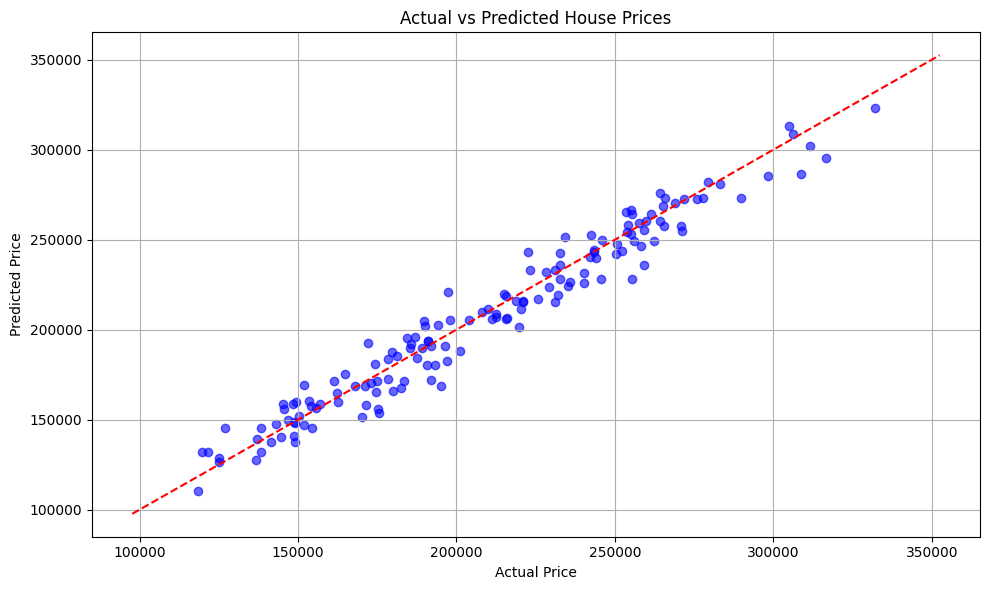

In [43]:
actual_price = y_test.values
predicted_price = prediction
plt.figure(figsize=(10,6))
plt.scatter(y_test , predicted_price, color="blue", alpha=0.6)
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.tight_layout()
plt.show()